In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.font_manager
%matplotlib inline

#### Functions

In [149]:
def pieHoleChartBuilder(labels, sizes, title, filename):
    '''Creates piechart'''
    
    labels = labels
    sizes = sizes
    
    colors = ['#ff9999','#66b3ff','#99ff99']
    explode = (0.01, 0.01, 0.01)  
    
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, colors = colors,explode = explode, labels=labels, autopct='%1.1f%%', startangle=90)
    
    #draw circle
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    
    # Equal aspect ratio ensures that pie is drawn as a circle
    ax1.axis('equal')  
    plt.title(title)
    plt.tight_layout()
    plt.savefig(filename)
    
    return plt.show()

In [217]:
def pieChartBuilder(labels, sizes, title, filename, explode, colors):
    '''Creates piechart'''
    
    labels = labels
    sizes = sizes
    
    colors = colors
    explode = explode  
    
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, colors = colors,
            explode = explode, 
            labels=labels, 
            autopct='%1.1f%%', 
            startangle=90, 
            shadow=True)
    
    # Equal aspect ratio ensures that pie is drawn as a circle
    ax1.axis('equal')  
    plt.title(title)
    plt.tight_layout()
    plt.savefig(filename)
    
    return plt.show()

In [202]:
def barGraphBuilder(objects, bins, title, ylabel,  filename):
    '''Creates bargraph'''
    objects = ('Negative', 'Positive', 'Indifferent')

    y_pos = np.arange(len(objects))
    bins = bins

    colors = ['#ff9999','#66b3ff','#99ff99']

    plt.bar(y_pos, bins, align='center', alpha=1, color=colors)
    plt.xticks(y_pos, objects)
    plt.ylabel(ylabel)
    plt.title(title)
#     plt.grid(True)
    plt.savefig(filename)
    
    return plt.show()

In [136]:
def zero_to_nan(list):
    return [np.nan if x==0 else x for x in list]

## Emotional Impact of Single-use Plastics
- Section analyzes responses to question 1 for all reponses, looking primarily at customers that expressed a negative view of single-plastic usage

In [189]:
Data = pd.read_csv('IntervieweeData.csv')
Data.head()

,Name,Emotional_Impact,Hurdles,Sex,Age,College_Student,Concerns/fears
0,Phat Nguyen,0,0,M,18-24,1,Environmental
1,Natalie Olvera,0,0,F,18-24,0,Environmental
2,Rosario Moreno,0,0,F,18-24,1,Environmental
3,Maria Moreno,0,1,F,45-54,0,None
4,p5,-1,1,M,45-54,0,None


In [190]:
#total number of participants
total_customers = Data.count()[0]
print("Total customers interviewed: " + str(total_customers))

Total customers interviewed: 25


In [191]:
#filtering for respondents with negative views of single-use plastics
Data_unfavorable_view = Data.loc[(Data["Emotional_Impact"] == 0)]

#filtering for respondents with positive views of single-use plastics
Data_favorable_view = Data.loc[(Data["Emotional_Impact"] == 1)]

#filtering for respondents with indifferent views of single-use plastics
Data_indifferent_view = Data.loc[(Data["Emotional_Impact"] == -1)]

In [192]:
#Number of respondents with negative views of single-use plastics
total_negative = Data_unfavorable_view.count()[0]

#Number of respondents with positive views of single-use plastics
total_positive = Data_favorable_view.count()[0]

#Number of respondents with indifferent views of single-use plastics
total_indifferent = Data_indifferent_view.count()[0]

In [193]:
print("Percentage of respondents with negative views of single-use plastics:")
print (str(100*(total_negative/total_customers)) + "%")

Percentage of respondents with negative views of single-use plastics:
60.0%


#### Visualization for emotional impact for entire dataset 

In [194]:
labels = ['Negative', 'Positive', 'Indifferent']
sizes = [total_negative, total_positive, total_indifferent]

title = 'Emotional Impact of Single-use Plastics'
filename = 'EmotionalImpactAll'

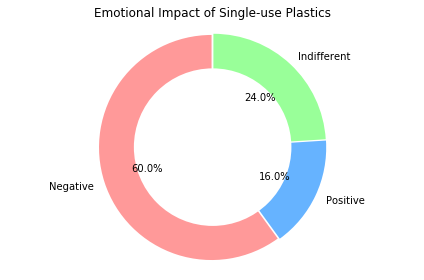

In [195]:
pieHoleChartBuilder(labels, sizes, title, filename)

#### Customers who are prefer alternatives to single-use plastics & encountered hurdles in the purchasing of alternatives

In [196]:
#total number of participants with negative perception of plastics
total_negative_customers = Data_unfavorable_view.count()[0]
print("Total: " + str(total_negative_customers))

Total: 15


In [197]:
#encountered hurdles in the purchasing of alternatives
Total_Negative_hurdles = Data_unfavorable_view.loc[(Data_unfavorable_view["Hurdles"] == 0)]

#encountered no hurdles in the purchasing of alternatives
Total_Positive_hurdles = Data_unfavorable_view.loc[(Data_unfavorable_view["Hurdles"] == 1)]

#no opinion on hurdles in the purchasing of alternatives
Total_Indifferent_hurdles = Data_unfavorable_view.loc[(Data_unfavorable_view["Hurdles"] == -1)]

In [198]:
#Number of respondents with negative views of single-use plastics
total_negative = Total_Negative_hurdles.count()[0]

#Number of respondents with positive views of single-use plastics
total_positive = Total_Positive_hurdles.count()[0]

#Number of respondents with indifferent views of single-use plastics
total_indifferent = Total_Indifferent_hurdles.count()[0]

In [199]:
print("Percentage of respondents with negative views of single-use plastics & Hurdles:")
print (str((100*(total_negative/total_negative_customers))) + "%")

Percentage of respondents with negative views of single-use plastics & Hurdles:
80.0%


#### Visualization for emotional impact & hurdles for entire dataset 

In [203]:
objects = ('Negative', 'Positive', 'Indifferent')
bins = [total_negative, total_positive, total_indifferent]

title = 'Customers Who view Single-use Plastics Unfavorably & Hurdles'
ylabel = 'Number of Customers'
filename = 'AllHurdles.png'

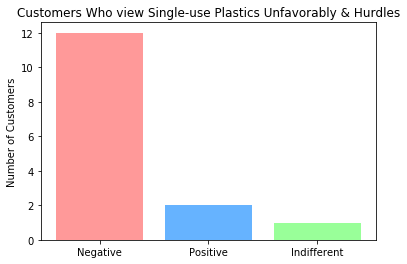

In [204]:
barGraphBuilder(objects, bins, title, ylabel,  filename)

## Emotional Impact of Single-use Plastics on Students

In [107]:
#Create subset of student data only
Student_data = Data.loc[(Data["College_Student"] == '1')]

total_data_filtered = Data.loc[(Data["College_Student"] != 'U')]


Student_data.head()

,Name,Emotional_Impact,Hurdles,Sex,Age,College_Student,Concerns/fears
0,Phat Nguyen,0,0,M,18-24,1,Environmental
2,Rosario Moreno,0,0,F,18-24,1,Environmental
10,Isabella Rondon,1,0,F,18-24,1,None
12,Joumana Altalal,0,0,F,18-24,1,Environmental
14,Abbey Biehl,0,0,F,18-24,1,Environmental


In [94]:
#total number of students
total_students = Student_data.count()[0]
print("Total Students: " + str(total_students))

Total Students: 11


In [118]:
#percentage of known students in dataset
student_representation = (str((100*(total_students/total_customers))) + "%")
print("Percentage of Students in dataset: " + student_representation)

Percentage of Students in dataset: 44.0%


In [113]:
#percentage of known students in dataset when filtering out unknown student statuses
total_filtered = total_data_filtered.count()[0]

filtered_student_representation = (str((100*(total_students/total_filtered))) + "%")

print("Percentage of Students in dataset: " + filtered_student_representation)

Percentage of Students in dataset: 55.00000000000001%


In [112]:
#filtering for students with negative views of single-use plastics
students_unfavorable_view = Student_data.loc[(Student_data["Emotional_Impact"] == 0)]

#filtering for students with positive views of single-use plastics
students_favorable_view = Student_data.loc[(Student_data["Emotional_Impact"] == 1)]

#filtering for students with indifferent views of single-use plastics
students_indifferent_view = Student_data.loc[(Student_data["Emotional_Impact"] == -1)]

In [122]:
#Number of students with negative views of single-use plastics
total_student_negative = students_unfavorable_view.count()[0]

#Number of respondents with positive views of single-use plastics
total_student_positive = students_favorable_view.count()[0]

#Number of respondents with indifferent views of single-use plastics
total_student_indifferent = students_indifferent_view.count()[0]

#### Visualization for emotional impact on students

In [120]:
labels = ['Negative', 'Positive', 'Indifferent']

sizes = [total_student_negative, 
         total_student_positive, 
         total_student_indifferent]

title = 'Emotional Impact of Single-use Plastics On Students'
filename = 'EmotionalImpactStudents'

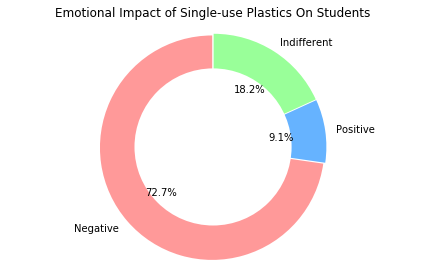

In [121]:
pieHoleChartBuilder(labels, sizes, title, filename)

#### Customers who are prefer alternatives to single-use plastics & encountered hurdles in the purchasing of alternatives

In [126]:
#total number of students with negative perception of plastics
print("Total Students who prefer alternatives: " + str(total_student_negative))

Total Students who prefer alternatives: 8


In [127]:
#encountered hurdles in the purchasing of alternatives
Students_Negative_hurdles = students_unfavorable_view.loc[(students_unfavorable_view["Hurdles"] == 0)]

#encountered no hurdles in the purchasing of alternatives
Students_Positive_hurdles = students_unfavorable_view.loc[(students_unfavorable_view["Hurdles"] == 1)]

#no opinion on hurdles in the purchasing of alternatives
Students_Indifferent_hurdles = students_unfavorable_view.loc[(students_unfavorable_view["Hurdles"] == -1)]

In [130]:
#Number of students with negative views of single-use plastics
total_student_negative_h = Students_Negative_hurdles.count()[0]

#Number of respondents with positive views of single-use plastics
total_student_positive_h = Students_Positive_hurdles.count()[0]

#Number of respondents with indifferent views of single-use plastics
total_student_indifferent_h = Students_Indifferent_hurdles.count()[0]

In [132]:
print("Percentage of students with negative views of single-use plastics & Hurdles:")
print (str((100*(total_student_negative_h/total_student_negative))) + "%")

Percentage of students with negative views of single-use plastics & Hurdles:
100.0%


In [219]:
objects = ('Negative', 'Positive', 'Indifferent')

bins = [total_student_negative_h, 
        total_student_positive_h, 
        total_student_indifferent_h]

title = 'Students Who View Single-use Plastics Unfavorably & Hurdles'
ylabel = 'Number of Students'
filename = 'StudentsHurdles.png'

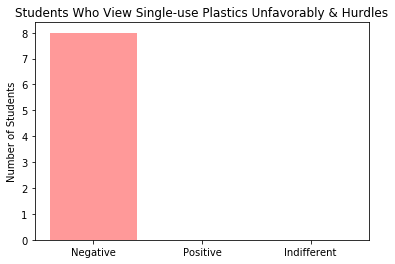

In [220]:
barGraphBuilder(objects, bins, title, ylabel,  filename)

#### Students & Concerns 

In [144]:
Student_data

,Name,Emotional_Impact,Hurdles,Sex,Age,College_Student,Concerns/fears
0,Phat Nguyen,0,0,M,18-24,1,Environmental
2,Rosario Moreno,0,0,F,18-24,1,Environmental
10,Isabella Rondon,1,0,F,18-24,1,None
12,Joumana Altalal,0,0,F,18-24,1,Environmental
14,Abbey Biehl,0,0,F,18-24,1,Environmental
15,Sovoya Davis,-1,1,F,25-34,1,Environmental
16,Chand Haryani,0,0,M,18-24,1,Environmental
17,Curtis Herbert,0,0,M,18-24,1,None
20,Melany Ruiz-Cruz,-1,0,F,18-24,1,Environmental
23,Trisha Singh,0,0,F,18-24,1,Environmental


In [148]:
#Student concern ditribution 
concerns = Student_data['Concerns/fears'].describe()
concerns

count                11
unique                2
top       Environmental
freq                  9
Name: Concerns/fears, dtype: object

In [156]:
#Number of students that expressed fear/concerns for environment
environmental_count = Student_data.loc[(Student_data["Concerns/fears"] == 'Environmental')].count()[0]

#Number of students that expressed no fear/concerns 
none_count = Student_data.loc[(Student_data["Concerns/fears"] == 'None')].count()[0]

In [215]:
labels = ['Environmental', 'Other']
sizes = [environmental_count, none_count]

title = "Distribution of Student Fears & Concerns"
filename= 'StudentConcerns'

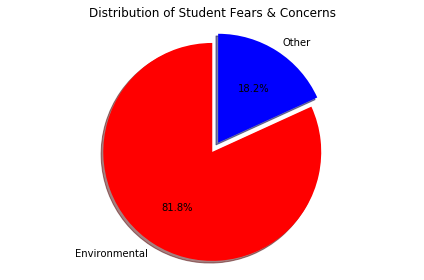

In [218]:
pieChartBuilder(labels, sizes, title, filename, explode = (0, 0.1), colors=['red','blue']  )